In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [176]:
train = pd.read_csv('Train_SU63ISt.csv')
test = pd.read_csv('Test_0qrQsBZ.csv')

In [177]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
ID          5112 non-null int64
Datetime    5112 non-null object
dtypes: int64(1), object(1)
memory usage: 80.0+ KB


In [178]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [179]:
train.shape

(18288, 3)

In [180]:
test.shape

(5112, 2)

In [181]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [182]:
train['Datetime'] = pd.to_datetime(train['Datetime'],format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test['Datetime'],format='%d-%m-%Y %H:%M')

In [183]:
train_origional = train.copy()
test_origional = test.copy()

In [184]:
train_origional.info()
test_origional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null datetime64[ns]
Count       18288 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
ID          5112 non-null int64
Datetime    5112 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 80.0 KB


In [185]:
 for i in (train,test,train_origional,test_origional):
        i['year']=i.Datetime.dt.year
        i['month']=i.Datetime.dt.month
        i['day']=i.Datetime.dt.day
        i['Hours']=i.Datetime.dt.hour

In [186]:
train['Day of week'] = train['Datetime'].dt.dayofweek

In [187]:
temp = train['Datetime']

In [188]:
def applyer(row):
    if row.dayofweek==5 or row.dayofweek==6:
        return 1
    else:
        return 0

In [189]:
temp2 = train['Datetime'].apply(applyer)
train['weekend']=temp2

In [190]:
train.head()

,ID,Datetime,Count,year,month,day,Hours,Day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [191]:
train.index =train['Datetime']
train.drop('ID',axis=1)
ts= train['Count']

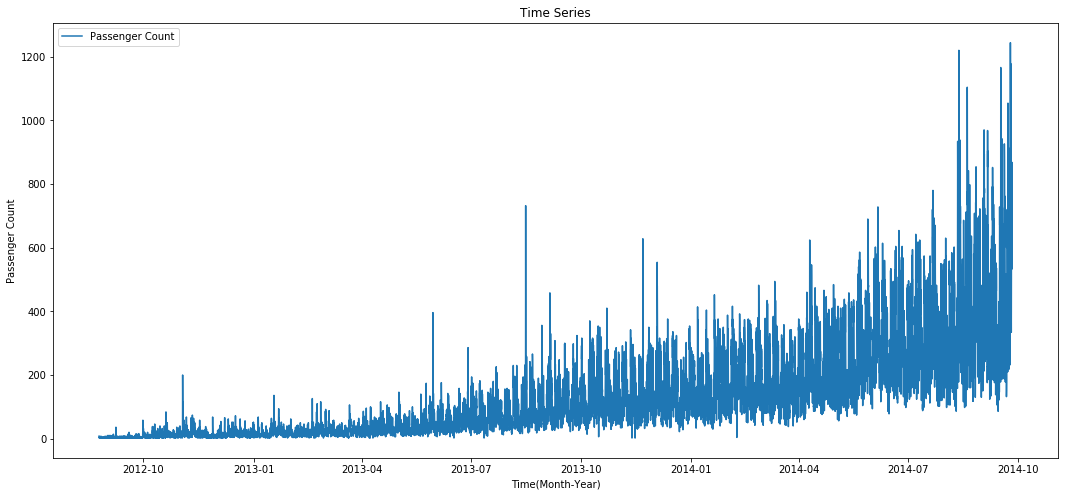

In [192]:
plt.figure(figsize=(18,8))
plt.plot(ts,label='Passenger Count')
plt.title('Time Series')
plt.xlabel('Time(Month-Year)')
plt.ylabel('Passenger Count')
plt.legend(loc='best')

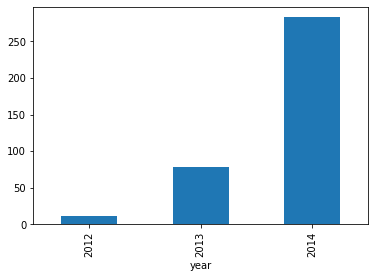

In [193]:
train.groupby('year')['Count'].mean().plot.bar()

In [194]:
train.head()

,ID,Datetime,Count,year,month,day,Hours,Day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


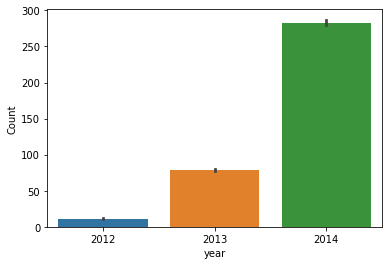

In [195]:
sns.barplot(x=train['year'],y=train['Count'])

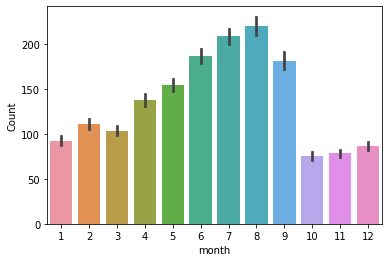

In [196]:
sns.barplot(x=train['month'],y=train['Count'])

In [197]:
temp= train.groupby(['year','month'])['Count'].mean()

In [198]:
temp

year  month
2012  8          2.952381
      9          4.444444
      10        10.986559
      11        15.827778
      12        15.680108
2013  1         18.430108
      2         22.190476
      3         23.588710
      4         34.405556
      5         45.612903
      6         57.333333
      7         74.787634
      8        100.137097
      9        120.744444
      10       139.932796
      11       141.000000
      12       157.387097
2014  1        167.204301
      2        200.202381
      3        183.994624
      4        240.955556
      5        264.497312
      6        316.113889
      7        343.354839
      8        389.981183
      9        468.433333
Name: Count, dtype: float64

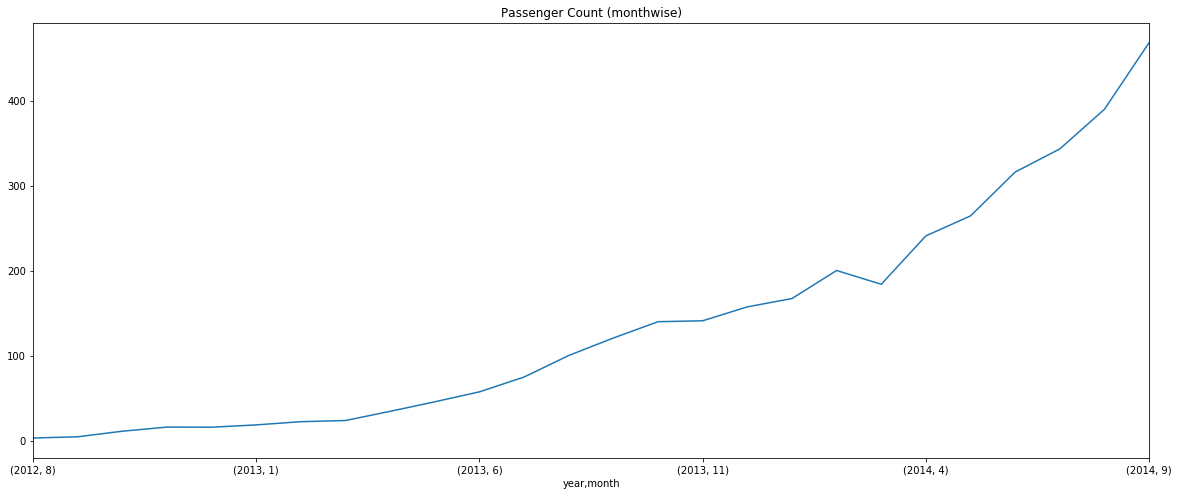

In [199]:
plt.figure(figsize=(20,8))
temp.plot(title='Passenger Count (monthwise)')

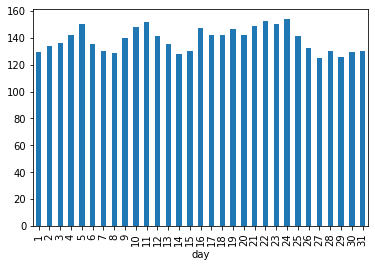

In [200]:
temp3=train.groupby(['day'])['Count'].mean().plot.bar()

In [201]:
train.head()

,ID,Datetime,Count,year,month,day,Hours,Day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


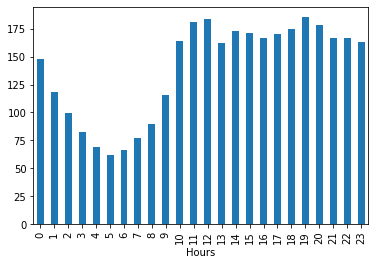

In [202]:
temp4= train.groupby(['Hours'])['Count'].mean().plot.bar()



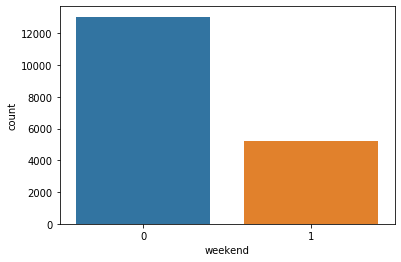

In [203]:
sns.countplot(x=train['weekend'])

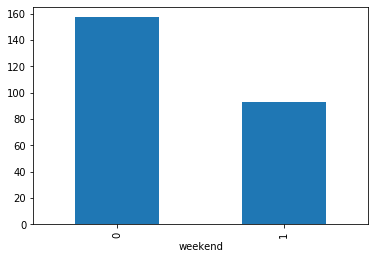

In [204]:
temp5 = train.groupby(['weekend'])['Count'].mean().plot.bar()

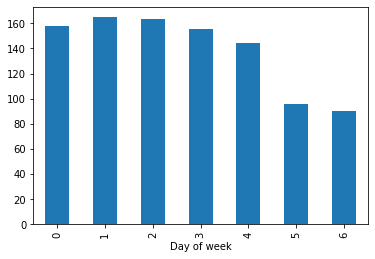

In [205]:
train.groupby(['Day of week'])['Count'].mean().plot.bar()

In [206]:
train.drop('ID',axis=1)

,Datetime,Count,year,month,day,Hours,Day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1
...,...,...,...,...,...,...,...,...
2014-09-25 19:00:00,2014-09-25 19:00:00,868,2014,9,25,19,3,0
2014-09-25 20:00:00,2014-09-25 20:00:00,732,2014,9,25,20,3,0
2014-09-25 21:00:00,2014-09-25 21:00:00,702,2014,9,25,21,3,0


In [207]:
train['TimeStamp'] = pd.to_datetime(train['Datetime'],format='%d-%m-%Y %H:%M')

In [208]:
train.index= train['TimeStamp']

In [210]:
hourly = train.resample('H').mean()
daily = train.resample('D').mean()
weekly = train.resample('W').mean()
monthly = train.resample('M').mean()

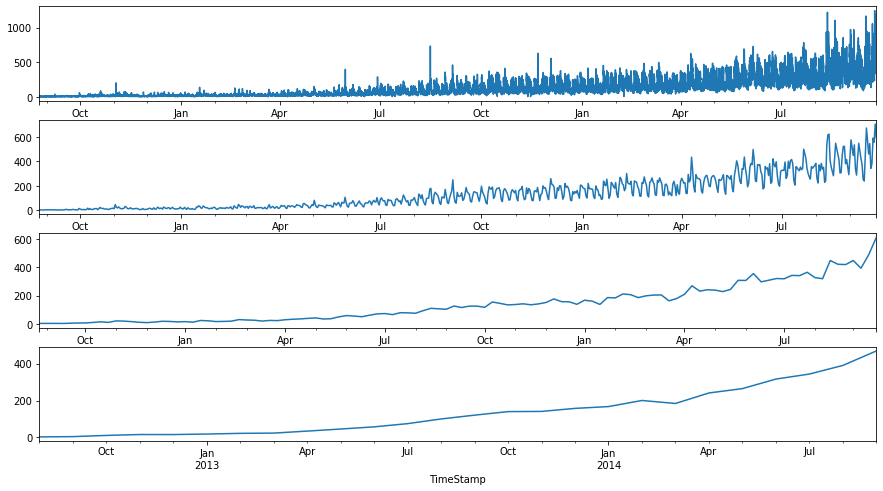

In [211]:
fig,axs=plt.subplots(4,1)
hourly['Count'].plot(figsize=(15,8),ax=axs[0])
daily['Count'].plot(figsize=(15,8),ax=axs[1])
weekly['Count'].plot(ax=axs[2])
monthly['Count'].plot(ax=axs[3])

In [212]:
test['TimeStamp']=pd.to_datetime(test['Datetime'],format='%d-%m-Y %H:%M')
test.index=test['TimeStamp']

In [213]:
test = test.resample('D').mean()

In [214]:
test.head()

,ID,year,month,day,Hours
TimeStamp,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5
2014-09-27,18323.5,2014.0,9.0,27.0,11.5
2014-09-28,18347.5,2014.0,9.0,28.0,11.5
2014-09-29,18371.5,2014.0,9.0,29.0,11.5
2014-09-30,18395.5,2014.0,9.0,30.0,11.5


In [215]:
train['TimeStamp']=pd.to_datetime(train['Datetime'],format='%d-%m-Y %H:%M')
train.index=train['TimeStamp']

In [216]:
train=train.resample('D').mean()

In [217]:
train.head()

,ID,Count,year,month,day,Hours,Day of week,weekend
TimeStamp,,,,,,,,
2012-08-25,11.5,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,35.5,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,59.5,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,83.5,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,107.5,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0
